In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

2023-05-03 16:27:09.072299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 205s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

Text(0.5, 1.0, 'Class distribution in training set')

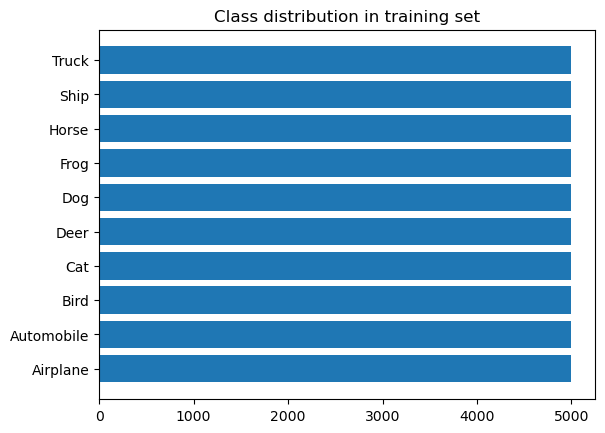

In [7]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

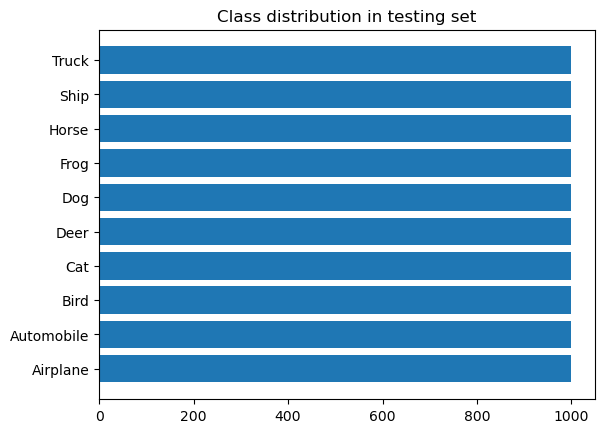

In [8]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

### Data Pre-process

In [11]:
from tensorflow.keras.utils import to_categorical

# Scale the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [13]:
x_train.shape

(50000, 32, 32, 3)

### Defining the Model

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 15, 15, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                      

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', min_delta=0.5, patience=5, mode='auto')
history = model.fit(x_train, y_train, epochs=35, validation_split=0.25, batch_size=64, callbacks=[es])

Epoch 1/35
586/586 [==============================] - 104s 173ms/step - loss: 1.4415 - accuracy: 0.4834 - val_loss: 1.9751 - val_accuracy: 0.2779
Epoch 2/35
586/586 [==============================] - 96s 164ms/step - loss: 1.1067 - accuracy: 0.6078 - val_loss: 9.8581 - val_accuracy: 0.1468
Epoch 3/35
586/586 [==============================] - 97s 165ms/step - loss: 0.9406 - accuracy: 0.6705 - val_loss: 10.7086 - val_accuracy: 0.1089
Epoch 4/35
586/586 [==============================] - 86s 147ms/step - loss: 0.8113 - accuracy: 0.7157 - val_loss: 37.7337 - val_accuracy: 0.1025
Epoch 5/35
586/586 [==============================] - 85s 145ms/step - loss: 0.6909 - accuracy: 0.7562 - val_loss: 42.9909 - val_accuracy: 0.1007
Epoch 6/35
586/586 [==============================] - 91s 155ms/step - loss: 0.6067 - accuracy: 0.7883 - val_loss: 13.3753 - val_accuracy: 0.2093


In [22]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 5s - loss: 13.4392 - accuracy: 0.2111 - 5s/epoch - 15ms/step


In [23]:
print('Test loss is ',test_loss)
print('Test Accuracy is ',test_acc)

Test loss is  13.439213752746582
Test Accuracy is  0.2110999971628189


Text(0.5, 1.0, 'Train - Accuracy')

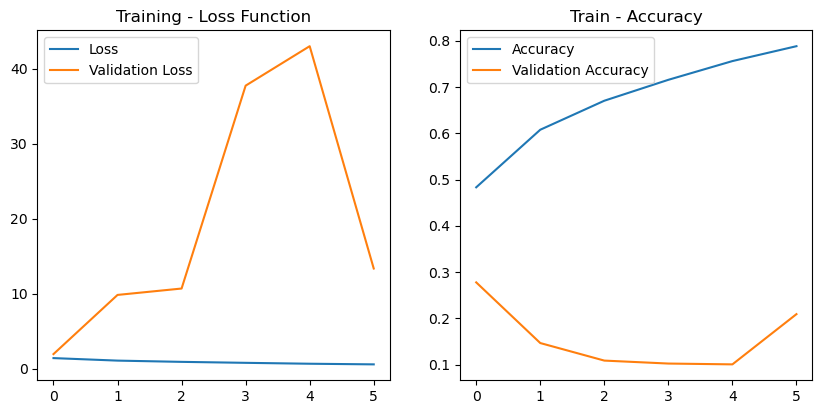

In [24]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')